# Perform 6
In this assignment, you will demonstrate your learning about creating data visualizations in Python using Seaborn. When you finish please go to Kernel --> Restart and Run All, and then double check that your notebook looks correct and all visualizations are visible before saving and submitting your .ipynb file (the notebook file) on gradescope.

We will work with the `university_data.csv` dataset imported into the `uni` DataFrame below. We then preview the first few rows. It contains information about 311 universities in the United States including average student test scores and gpa, tuition costs, the state in which the school is located, the ranking, etc.

In [1]:
# Run but do not modify this code
import seaborn as sns
import pandas as pd
sns.set_theme()
uni = pd.read_csv("university_data.csv")
print(uni.shape)
uni.head()

(311, 13)


,act_avg,sat_avg,enrollment,city,acceptance_rate,percent_receiving_aid,cost_after_aid,state,hs_gpa_avg,tuition,Institution_name,institution_type,us_rank
0,32.0,1400.0,5400.0,Princeton,7.0,60.0,16793.0,NJ,3.9,47140,Princeton University,private,1.0
1,32.0,1430.0,6710.0,Cambridge,5.0,55.0,16338.0,MA,4.0,48949,Harvard University,private,2.0
2,32.0,1450.0,5941.0,Chicago,8.0,42.0,27767.0,IL,4.0,54825,University of Chicago,private,3.0
3,32.0,1420.0,5472.0,New Haven,6.0,50.0,18385.0,CT,NaN,51400,Yale University,private,3.0
4,32.0,1430.0,6113.0,New York,6.0,48.0,21041.0,NY,NaN,57208,Columbia University,private,5.0


### Question 1
1. Generate a scatterplot of `tuition` on the horizontal `x` axis and `sat_avg` on the vertical `y` axis.
2. Generate the same scatterplot as in step 1, but color the points according to `institution_type`.
3. Briefly interpret the visualizations you created in steps 1 and 2. What does it show about the correlation between `tuition` and `sat_avg`? About the difference between `public` and `private` institutions?

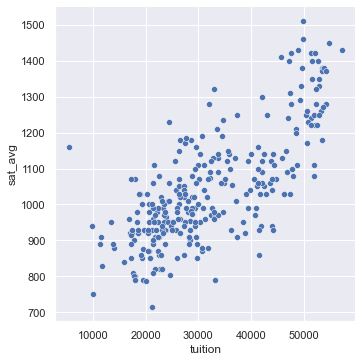

In [2]:
# Put your code for question 1.1 here
sns.relplot(data=uni,x='tuition',y='sat_avg',kind='scatter')

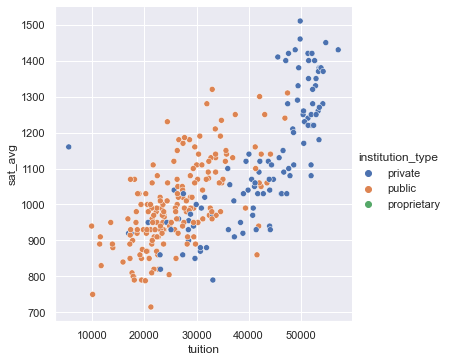

In [3]:
# Put your code for question 1.2 here
sns.relplot(data=uni,x='tuition',y='sat_avg',kind='scatter',hue='institution_type')

### Answer 1
In the first answer, it looks like the higher the sat average the higher the tuition, and in the second answer it seems like private institutions have a higher tuition and higher sat averages than public institutions.

### Question 2
1. Below, we plot a histogram of `hs_gpa_avg`, the average high school gpa, for the schools. We set the `bins` manually. Identify at least two problems with our setting of `bins` that make the histogram difficult to read and or misleading. You do not need to replot the histogram to answer this question, but you are welcome to modify the `bins` parameter to see what different settings would give you in the visualization.
2. (scroll for next problem)

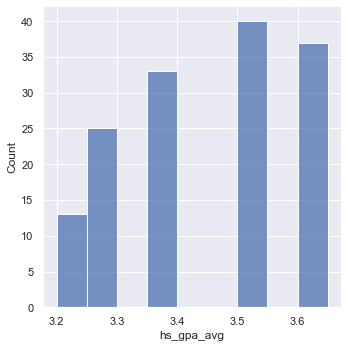

In [4]:
# Run this code, can modify to experiment but not required, answer below
sns.displot(data=uni, x="hs_gpa_avg", bins=[3.2 + 0.05*i for i in range(10)])

2. Below we plot a heat map that visualizes the relationship between `hs_gpa_avg` on the horizontal `x` axis and `sat_avg` on the vertical `y` axis. It looks like there is a strong relationship between `hs_gpa_avg` and `sat_avg`. Suppose someone interprets this plot by saying "Look, every student who has a good high school gpa of 3.75 or above gets a SAT score of at least 900 or so." Why is this not necessarily true?

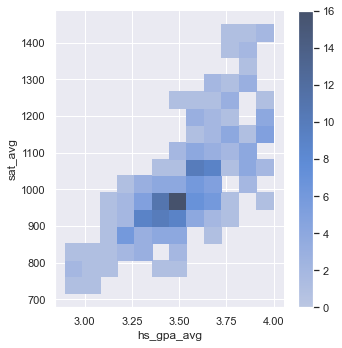

In [5]:
# Run this code, can modify to experiment but not required, answer below
sns.displot(data=uni, x="hs_gpa_avg", y="sat_avg", cbar=True)

### Answer 2
1. First off the bins don't represent all of the GPA values since there are some in the dataset that are below 3.2. A second issue is that the GPAs don't go to two decimal places for all increments, so the .05 increment makes it seem like there are weird spaces in the data.
2. As shown by the color distribution, there isn't a high number of people with above a 3.75 GPA compared to the higher count aroud 3.5, so the number of samples we have to back up the relationship we're seeing isn't enough to say anything definite. 

### Question 3
1. Generate a bar plot showing the difference in the distribution of `hs_gpa_avg` between `public` and `private` schools. That is, there should be two bars showing the average values of `hs_gpa_avg` for `public` vs. `private` schools. There are a small number of `proprietary` schools in the dataset which are missing data in this category; filter those out so they do not appear in this visualization.
2. Visualize the same information as in step 1, but using a box plot to visualize the distributions. As in step 1, do not include `proprietary` schools in the visualization. Briefly interpret your results, especialy explaining what information the box plot visaulizes that was not clear in the earlier bar plot.  

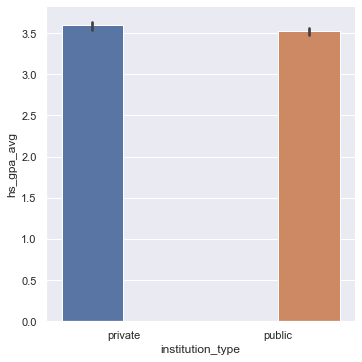

In [6]:
# Put your code for 3.1 here
institutionfltr=uni[uni['institution_type']!='proprietary']
sns.catplot(data=institutionfltr,x='institution_type',y='hs_gpa_avg',kind='bar',hue='institution_type')


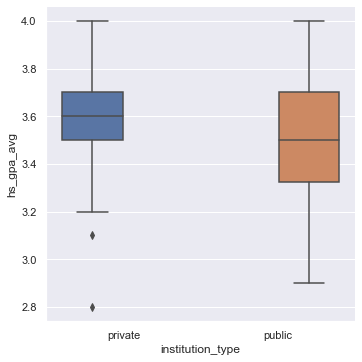

In [7]:
sns.catplot(data=institutionfltr,x='institution_type',y='hs_gpa_avg',kind='box',hue='institution_type')


### Answer 3
In the bar plot, the average gpa averages are similar for these types of schools, but the box plot shows that the actual gpa averages differ quite a bit. The range of public schools' average gpa is much greater than private schools' average gpa which isn't really shown with the bar graph.

### Question 4
1. Generate a line plot of `us_rank` on the horizontal `x` axis and `tuition` on the vertical `y` axis. 
2. In a single figure, plot the same line as in step 2 in one color and another line for `cost_after_aid` on the vertical `y` axis in a different color. Use the same `us_rank` ordering on the horizontal `x` axis for both. Note that you may need to wrangle your data somewhat to produce this on the same plot rather than directly using the `uni` dataframe.
3. In step 2 we plotted `tuition` and `cost_after_aid` on the same vertical `y` axis. Briefly explain why that was reasonable, but it would not make sense to plot `tuition` and `enrollment` on the same vertical `y` axis in the same way. 

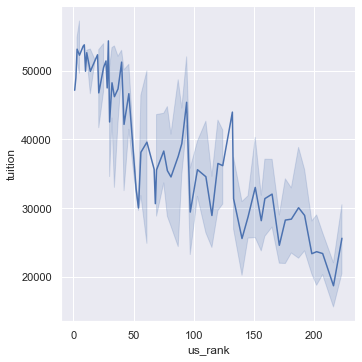

In [8]:
# Put your code for 4.1 here
sns.relplot(data=uni,x='us_rank',y='tuition',kind='line')


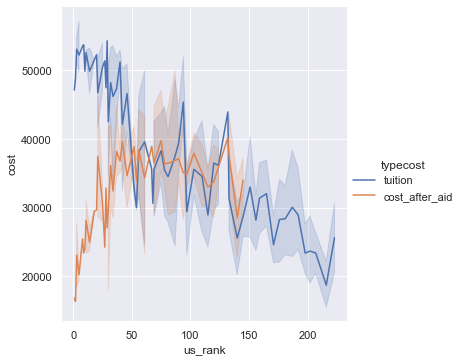

In [9]:
# Put your code for 4.2 here
uni2=pd.melt(uni, id_vars=['us_rank'], value_vars=['tuition', 'cost_after_aid'],var_name='typecost', value_name='cost')


sns.relplot(data=uni2,x='us_rank',y='cost',kind='line', hue= 'typecost')

### Answer 4
Tuition and cost after aid are comparable values within the same magnitude because cost after aid is just a measure of tuition after some function has been applied to it. Enrollment doesn't really compare to tuition on that same scale since we're measuring people and not dollars.

### Question 5
Inside of the homework folder we include an image `state_enrollments_fig.png` that visualizes the total enrollment of all of the universities in the `uni` dataset grouped by state. It is a horizontal bar plot that is sorted by the values from greatest to least. It was generated by manipulating the `uni` dataset with Pandas and then plotting with Seaborn.

Create a similar visualization, except instead of just visualizing total enrollment by state, visualize total enrollment per capita by state. That is, for each state, calculate the total enrollment in that state across all universities in the `uni` dataset, and then divide by that state's population. You can find the state populations as of the 2010 census in the `state_pops.csv` dataset, which uses the same two letter abbreviations for state names as the `uni` dataset.

Some tips on making your plot look like `state_enrollments_fig.png`:
- To prevent the image being "squashed" vertically, set the `height` parameter of the Seaborn plot call to `10`. 
- To simplify the colors to be gray rather than a rainbow, set the `color` parameter to `"gray"`.
- To make the bar plot horizontal, use the numerical variable (in this case enrollment per capita) for the horizontal `x` axis in Seaborn and the categorical variable (in this case the state name) for the vertical `y` axis.
- To sort the bars, you can either [sort the dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) according to the appropriate values before plotting or you can compute the ordering and then pass it to [the Seaborn order parameter](https://seaborn.pydata.org/generated/seaborn.catplot.html).

In [10]:
# Put your code here for problem 5
# Feel free to add additional cells
# to organize your code
pop = pd.read_csv("state_pops.csv")
print(pop.shape)
pop.head()

(51, 2)


,state,population_2010
0,AL,4779736
1,AK,710231
2,AZ,6392017
3,AR,2915918
4,CA,37253956


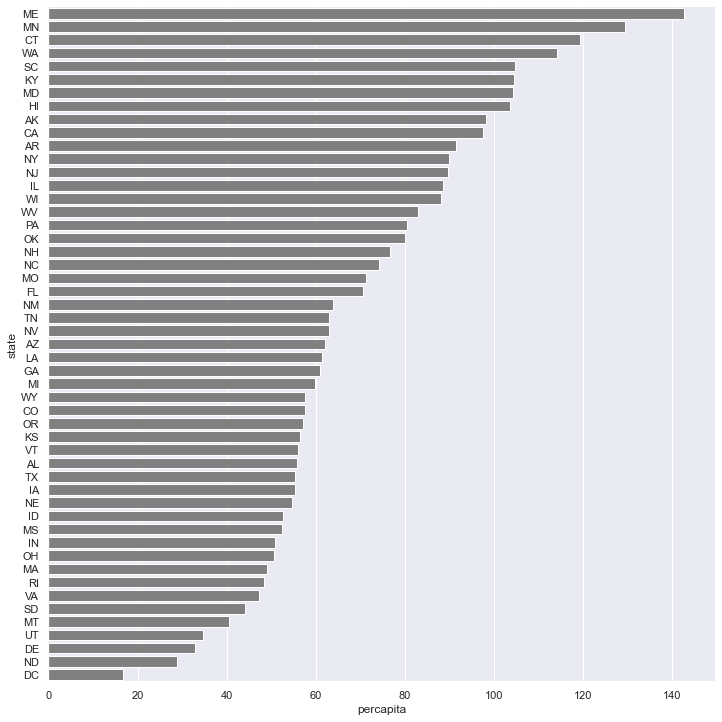

In [11]:
table=uni.pivot_table(index='state',
                    aggfunc={'enrollment':'sum'})

unipop=pd.merge(table,pop,on='state')
unipop['percapita']=unipop['population_2010']/unipop['enrollment']
unipop=unipop.sort_values(by='percapita',ascending=False)

sns.catplot(data=unipop,x='percapita',y='state',kind='bar', height=10,color='gray')


When you finish please go to Kernel --> Restart and Run All, and then double check that your notebook looks correct and all visualizations are visible before saving and submitting your .ipynb file (the notebook file) on gradescope.